<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/ML300_P4_C2_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step0: E-Commerce 영역과 플랫폼 서비스의 데이터

### E-Commerce & Platform Business 란?

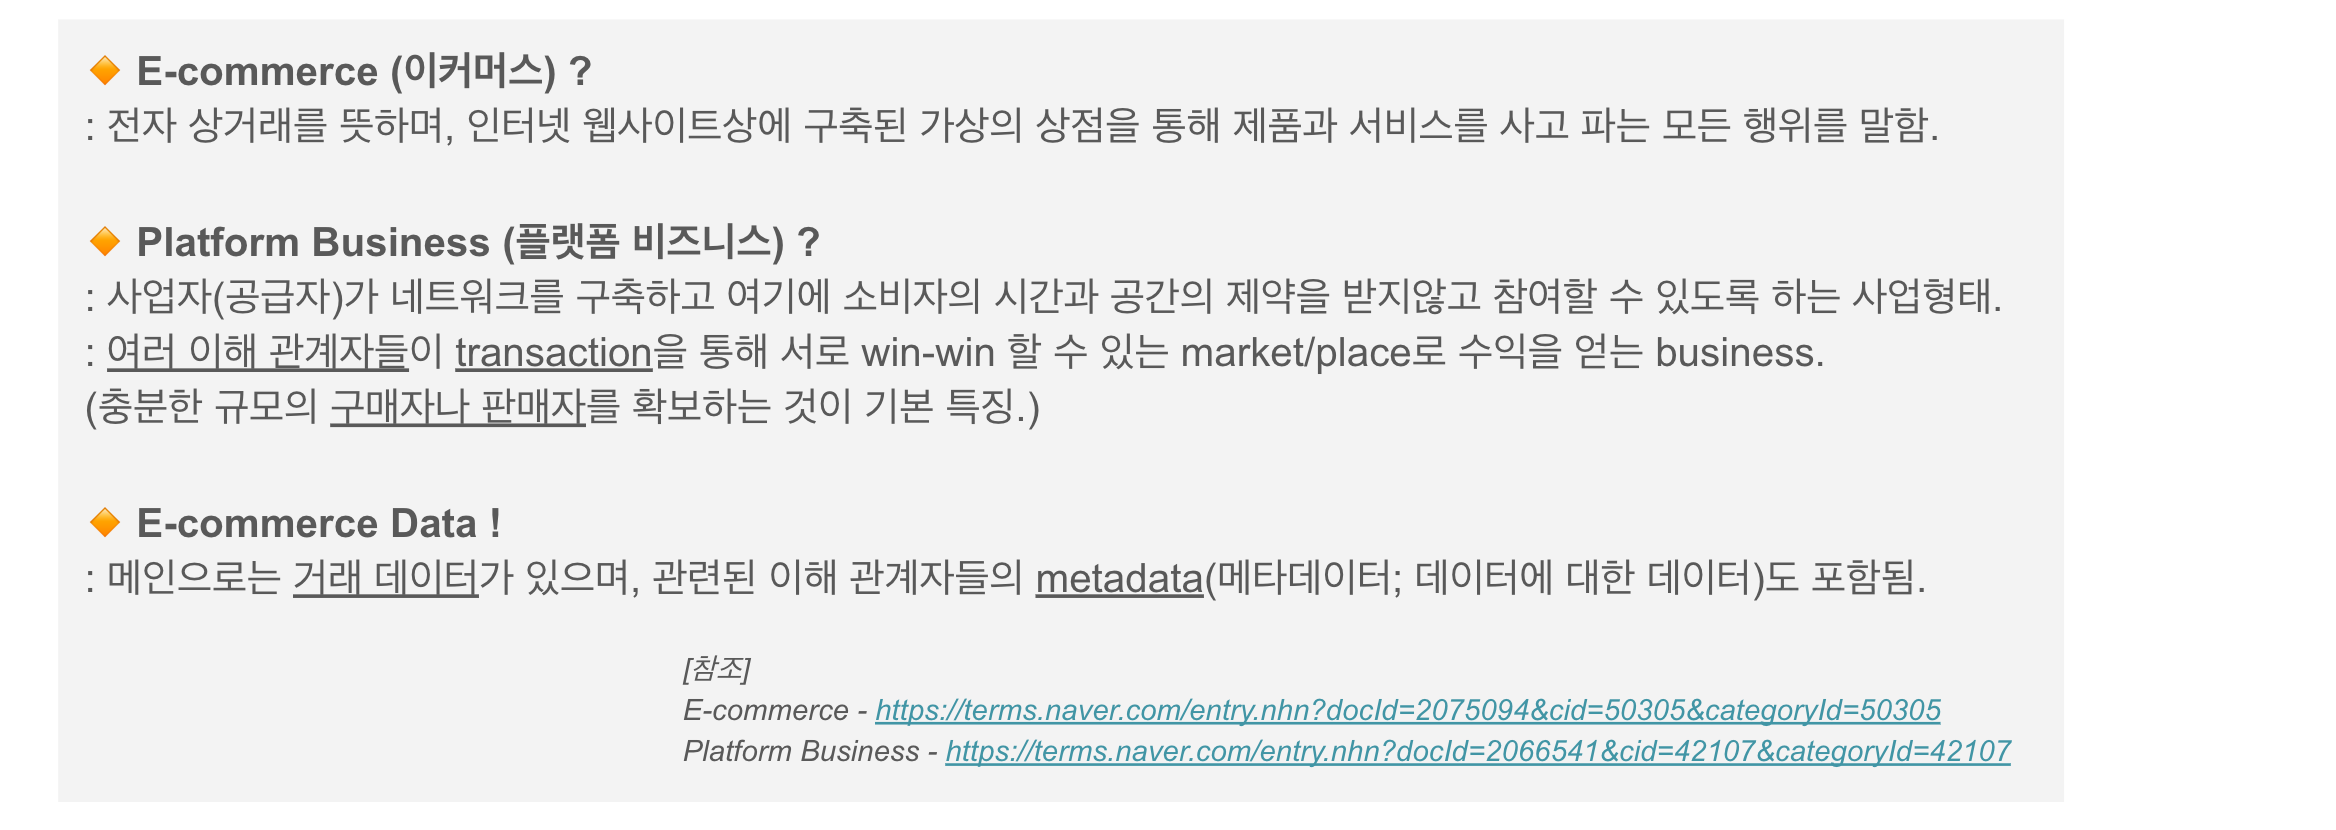

### E-Commerce data의 형태

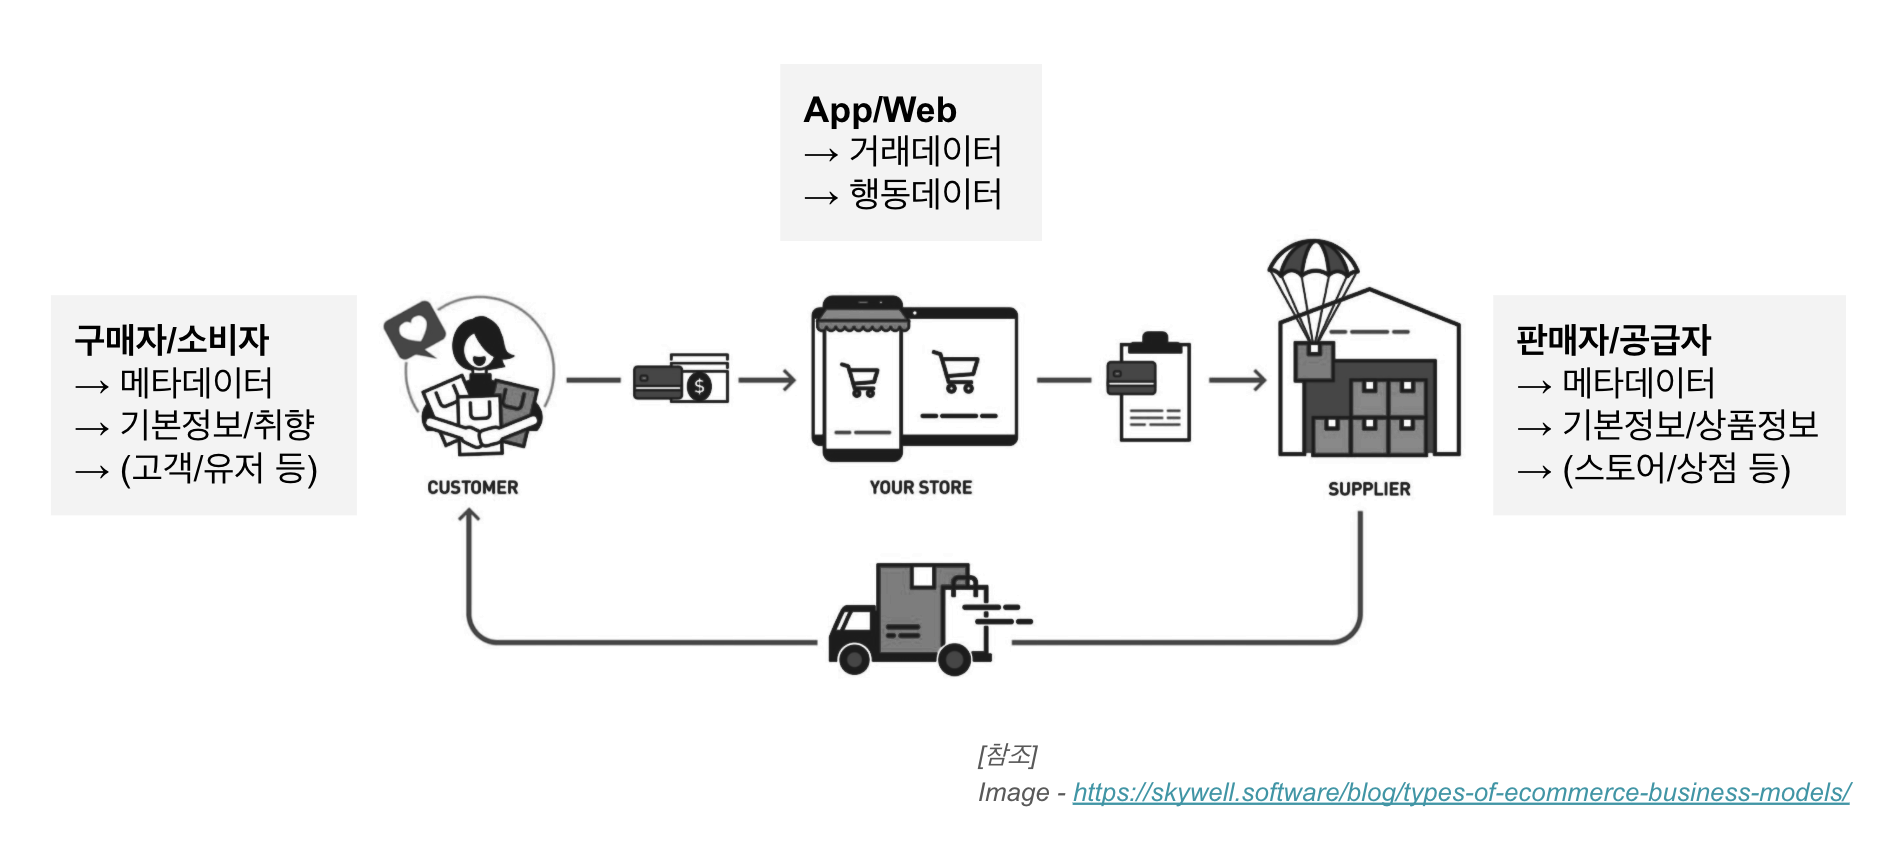

## Step1: E-Commerce 고객(수요) 데이터 불러오기 & 전처리

### 문제 1. E-Commerce 데이터 다운로드 (users)
: 주어진 url을 사용해서 E-Commerce 데이터를 다운로드 받아보세요.

In [32]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [33]:
# 데이터 url.
user_metadata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_meta_data.csv"
user_statsdata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_data.csv"

# 위의 url를 사용해서 각각의 DataFrame을 생성해보세요.
user_metadata_df = pd.read_csv(user_metadata_url, parse_dates=[0])
user_stats_df = pd.read_csv(user_statsdata_url, parse_dates=[0])

In [34]:
# load된 데이터의 형태(shape)을 확인해보세요.
user_metadata_df.shape, user_stats_df.shape

((3412, 10), (3412, 11))

In [35]:
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2


In [36]:
user_statsdata_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23


### 문제 2. E-Commerce 고객 메타데이터 둘러보기 (metadata)
: 데이터별 컬럼 명세서를 통해 E-Commerce 고객 메타 데이터를 파악해보세요.

#### [User metadata 컬럼 명세서]  

컬럼명 | 설명
--- | ---
user_id | 고객 고유 ID
sex | 성별 (0:남, 1:여)
birthday_year | 생일년도 (yyyy)
membership_type | 멤버십 타입 (100:비회원, 300-500:정회원)
category_prefer | 카테고리 선호 입력수 (int)
joined_date | 가입일자 (yyyy-mm-dd)
deleted_date | 탈퇴일자 (yyyy-mm-dd)
join_path | 가입경로 (None:일반가입,1:sns가입)
os | os 타입 (IOS, AOS)
recommended_cnt | 친구추천 수 (int)



In [37]:
user_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3412 non-null   object 
 1   sex              3412 non-null   int64  
 2   birthday_year    3412 non-null   int64  
 3   membership_type  3412 non-null   int64  
 4   category_prefer  3412 non-null   int64  
 5   joined_date      3412 non-null   object 
 6   deleted_date     3412 non-null   object 
 7   join_path        524 non-null    float64
 8   os               3412 non-null   object 
 9   recommended_cnt  3412 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 266.7+ KB


### 문제 3. E-Commerce 고객 메타데이터 전처리하기 (metadata)
: E-Commerce 고객 메타 데이터를 분석에 필요한 컬럼을 생성해보세요.

In [38]:
# 생일년도를 이용해 2022년 기준 고객 나이 정보를 만들기
this_year = 2022
user_metadata_df['age'] = this_year - user_metadata_df['birthday_year'] + 1
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,28
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,28
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,24
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,25
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,24


In [39]:
# 가입일자를 사용해서 2022년 1월 1일 기준 고객의 가입기간을 생성해보세요.
today_ymd = datetime(2022, 1, 1)

# 가입일자의 포멧을 날짜형식('datetime64[ns]')으로 변경해보세요.
user_metadata_df['joined_date'] = user_metadata_df['joined_date'].astype('datetime64[ns]')

# 가입기간을 일(day)로 계산해보세요.
user_metadata_df['days_from_joined'] = (today_ymd - user_metadata_df['joined_date']).dt.days

# 가입기간을 년도(year)로 계산해보세요. 
# [참고] np.timedelta64(1, "Y") 를 사용해보세요.
user_metadata_df["years_from_joined"] = (today_ymd - user_metadata_df['joined_date'])/np.timedelta64(1, 'Y')
user_metadata_df["years_from_joined"] = user_metadata_df["years_from_joined"].round(1)
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,28,845,2.3
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,28,628,1.7
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,24,1110,3.0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,25,1081,3.0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,24,787,2.2


In [40]:
# 탈퇴일자를 사용해서 2022년 1월 1일 기준 고객의 탈퇴여부를 binary로 나타내보세요.
# [참고] 탈퇴일자는 string 컬럼입니다. 
# user_metadata_df[user_metadata_df["deleted_date"]=="NaT"]
# 1: 탈퇴함, 0: 탈퇴하지 않음
user_metadata_df['if_deleted'] = np.where(user_metadata_df['deleted_date'] == 'NaT', 0, 1)
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,28,845,2.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,28,628,1.7,0
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,24,1110,3.0,0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,25,1081,3.0,0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,24,787,2.2,0


### 문제 4. E-Commerce 고객 거래데이터 둘러보기 (transaction data)
: 데이터별 컬럼 명세서를 통해 E-Commerce 고객 거래 데이터를 파악해보세요.

#### [User stat 컬럼 명세서]  

컬럼명 | 설명
--- | ---
user_id | 고객 고유 ID
membership_type | 멤버십 타입 (100:비회원, 300-500:정회원)
total_order_cnt | 총 거래건수
total_cost | 총 거래금액
avg_coupon_amt | 평균 쿠폰사용 금액
avg_point_amt | 평균 포인트사용 금액
weekly_order_cnt | 주평균 거래건수
monthly_order_cnt | 주평균 거래건수
avg_cost | 평균 거래금액
avg_item_cost | 평균 상품금액
last_date | 마지막 거래일자 (yyyy-mm-dd)



In [41]:
user_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            3407 non-null   object 
 1   membership_type    3412 non-null   int64  
 2   total_order_cnt    3412 non-null   float64
 3   total_cost         3412 non-null   float64
 4   avg_coupon_amt     3412 non-null   float64
 5   avg_point_amt      3412 non-null   float64
 6   weekly_order_cnt   3412 non-null   float64
 7   monthly_order_cnt  3412 non-null   float64
 8   avg_cost           3412 non-null   float64
 9   avg_item_cost      3412 non-null   float64
 10  last_date          3412 non-null   object 
dtypes: float64(8), int64(1), object(2)
memory usage: 293.3+ KB


In [42]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23


### 문제 5. E-Commerce 고객 거래데이터 전처리하기 (transaction data)

In [43]:
# 마지막 거래일자의 범위를 확인해 보세요.
user_stats_df.last_date.min(), user_stats_df.last_date.max()

('2020-01-01', '2020-06-30')

In [44]:
# 마지막 거래일자의 가장 오래된 날짜를 선택하여, Recency의 정도를 알아보는 컬럼을 생성해보세요.
# [참고] 기준점이 마지막 거래일자 직전일이 됩니다. (0일이 생기지 않게 하기위해)
oldest_ymd = datetime(2019,12,31)

# 날짜컬럼으로 변경하고 Recency 컬럼을 생성해보세요. ('datetime64[ns]')
# 뒤에서 진행할 분석법에서 숫자가 클수록 높은 점수를 부여하기 위해 과거 시간을 기준으로 일수를 역산합니다.
user_stats_df['last_date'] = user_stats_df['last_date'].astype('datetime64[ns]')
user_stats_df['days_of_recency'] = (user_stats_df['last_date'] - oldest_ymd).dt.days

In [45]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17,17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15,136
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02,62
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23,175


## Step2: Clustering - 고객(수요) 메타데이터를 이용한 군집화



### 문제 6. EDA : 고객(메타데이터) - 1차원에서 살펴보기
: 분류가 되어 있지 않은 데이터이므로, 사전 EDA를 통해 얻게되는 정보가 나중에 군집분석 결과를 해석/이해하는데 도움이 될때가 많습니다.  

```
[TIP] EDA에 사용되는 변수를 기준으로 1차원, 2차원 등 순서대로 EDA를 진행합니다.
```


In [46]:
# 컬럼별 null값 살펴보세요.
user_metadata_df.isnull().sum()

user_id                 0
sex                     0
birthday_year           0
membership_type         0
category_prefer         0
joined_date             0
deleted_date            0
join_path            2888
os                      0
recommended_cnt         0
age                     0
days_from_joined        0
years_from_joined       0
if_deleted              0
dtype: int64

In [47]:
# null값을 채워주세요.
user_metadata_df['join_path'] = user_metadata_df['join_path'].fillna(0)

In [48]:
# 고객 메타데이터 이므로 user_id 기준으로 unique 해야합니다. user_id 기준으로 중복 데이터를 확인해보세요.
user_metadata_df[user_metadata_df.duplicated(['user_id'])]

# 중복 데이터가 있다면 삭제해주세요.
# user_metadata_df.drop_duplicates(subset="user_id")


,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted


In [49]:
# membership_type별 고객 분포를 파악해보세요.
user_metadata_df.groupby(['membership_type'])[['user_id']].count().reset_index()

,membership_type,user_id
0,100,2667
1,300,513
2,400,126
3,500,106


In [50]:
# 가입기간(years_from_joined)에 따른 고객 분포를 확인해보세요.
user_cnt_from_joined_df = user_metadata_df.groupby(['years_from_joined'])[['user_id']].count().reset_index()


In [52]:
fig = px.bar(user_cnt_from_joined_df, x='years_from_joined', y='user_id')
fig.update_layout(height=500, width=1000)
fig.show()

In [54]:
user_cnt_from_joined_df.head()

,years_from_joined,user_id
0,1.0,64
1,1.1,106
2,1.2,108
3,1.3,128
4,1.4,100


In [56]:
# 카테고리 선호 입력수(category_prefer)에 따른 고객 분포를 확인해보세요.
user_cnt_by_ctg_df = user_metadata_df.groupby(['category_prefer'])[['user_id']].count().reset_index()
fig = px.bar(user_cnt_by_ctg_df, x='category_prefer', y='user_id')
fig.update_layout(height=500, width=1000)
fig.show()

In [58]:
# 친구추천 횟수(recommended_cnt)에 따른 고객 분포를 확인해보세요.
user_cnt_by_recomm_df = user_metadata_df.groupby(['recommended_cnt'])[['user_id']].count().reset_index()
fig = px.bar(user_cnt_by_recomm_df, x='recommended_cnt', y='user_id')
fig.update_layout(height=500, width=1000)
fig.show()

### 문제 7. EDA : 고객(메타데이터) - 2차원에서 살펴보기

In [59]:
# 변수간 상관계수 파악
corr_matrix = user_metadata_df.corr()
corr_matrix

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,-0.017552,-0.013729,0.005282,-0.016833,-0.016442,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.009461,0.258950,-1.000000,-0.138338,-0.138294,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,0.019963,-0.021604,0.069491,0.037165,0.037163,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.002226,0.171625,-0.504292,-0.007478,-0.007705,0.013642
join_path,-0.017552,0.009461,0.019963,0.002226,1.000000,0.006406,-0.009461,-0.064171,-0.063896,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,0.006406,1.000000,-0.258950,0.186742,0.187405,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.009461,-0.258950,1.000000,0.138338,0.138294,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-0.064171,0.186742,0.138338,1.000000,0.999718,-0.010898
years_from_joined,-0.016442,-0.138294,0.037163,-0.007705,-0.063896,0.187405,0.138294,0.999718,1.000000,-0.011318
if_deleted,0.001651,0.021408,0.009109,0.013642,-0.020725,0.009055,-0.021408,-0.010898,-0.011318,1.000000


In [60]:
# 유효한 정보만 확인하는 방법입니다.
# [참고] 상관계수중에 상대적/비교적으로 높은 관계를 찾아보세요.
corr_matrix[abs(corr_matrix)>=0.2]

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthday_year,NaN,1.000000,NaN,0.504292,NaN,0.25895,-1.000000,NaN,NaN,NaN
membership_type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_prefer,NaN,0.504292,NaN,1.000000,NaN,NaN,-0.504292,NaN,NaN,NaN
join_path,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
recommended_cnt,NaN,0.258950,NaN,NaN,NaN,1.00000,-0.258950,NaN,NaN,NaN
age,NaN,-1.000000,NaN,-0.504292,NaN,-0.25895,1.000000,NaN,NaN,NaN
days_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.999718,NaN
years_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999718,1.000000,NaN
if_deleted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [61]:
# 상관계수를 heatmap으로 나타내보세요.
corr_matrix.style.background_gradient()

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,-0.017552,-0.013729,0.005282,-0.016833,-0.016442,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.009461,0.258950,-1.000000,-0.138338,-0.138294,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,0.019963,-0.021604,0.069491,0.037165,0.037163,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.002226,0.171625,-0.504292,-0.007478,-0.007705,0.013642
join_path,-0.017552,0.009461,0.019963,0.002226,1.000000,0.006406,-0.009461,-0.064171,-0.063896,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,0.006406,1.000000,-0.258950,0.186742,0.187405,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.009461,-0.258950,1.000000,0.138338,0.138294,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-0.064171,0.186742,0.138338,1.000000,0.999718,-0.010898
years_from_joined,-0.016442,-0.138294,0.037163,-0.007705,-0.063896,0.187405,0.138294,0.999718,1.000000,-0.011318
if_deleted,0.001651,0.021408,0.009109,0.013642,-0.020725,0.009055,-0.021408,-0.010898,-0.011318,1.000000


In [64]:
# age & category_prefer 관계를 나타내는 scatter plot을 그려보세요.
fig = px.scatter(user_metadata_df, x='age', y='category_prefer')
fig.update_layout(width=600, height=500)
fig.show()

In [65]:
# age & recommended_cnt 관계를 나타내는 scatter plot을 그려보세요.
fig = px.scatter(user_metadata_df, x='age', y='recommended_cnt')
fig.update_layout(width=600, height=500)
fig.show()

In [66]:
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,28,845,2.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,28,628,1.7,0
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,0.0,AOS,6,24,1110,3.0,0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,0.0,AOS,2,25,1081,3.0,0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,0.0,AOS,2,24,787,2.2,0


In [70]:
# sex & join_path (pivot_table() 사용.)
user_metadata_df.pivot_table(values='user_id', index='sex', columns='join_path',aggfunc='count')

join_path,0.0,1.0
sex,,
0,1253,240
1,1635,284


### 문제 8. Clustering : 고객(메타데이터) - 고객 메타데이터 정제 및 데이터셋 분리.

In [71]:
# 고객 메타데이터에서 군집분석을 위한 변수만 남겨보세요.
# [참고] 아래 리스트(numerics_types)를 사용하여 숫자 형태의 변수만 남겨보세요.
numerics_types = ['int16', 'int32', 'int64', 'float64', 'float32','float16']
user_numerics_df = user_metadata_df.select_dtypes(include=numerics_types)
user_numerics_df.head()

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,0,1995,300,3,0.0,4,28,845,2.3,0
1,1,1995,300,2,0.0,1,28,628,1.7,0
2,1,1999,300,4,0.0,6,24,1110,3.0,0
3,0,1998,300,7,0.0,2,25,1081,3.0,0
4,1,1999,300,6,0.0,2,24,787,2.2,0


In [73]:
# 군집화에서 binary변수와 일반 숫자변수를 혼용해서 훈련시키는 것을 지양합니다.
# binary변수를 제거하세요.
# [참고] np.isin()을 활용해보세요.
user_numerics_cols = [col for col in user_numerics_df if np.isin(user_numerics_df[col].unique(), [0, 1]).all()]
user_numerics_df = user_numerics_df.drop(user_numerics_cols, axis=1)
user_numerics_df.head()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1995,300,3,4,28,845,2.3
1,1995,300,2,1,28,628,1.7
2,1999,300,4,6,24,1110,3.0
3,1998,300,7,2,25,1081,3.0
4,1999,300,6,2,24,787,2.2


In [74]:
# membership_type 변수를 분리해보세요.
# [참고] membership_type을 포함시켜도 되지만, 군집결과와 임의로 비교해볼 y값으로 분리시켜 놓습니다.
user_x_columns = list(user_numerics_df.columns)
user_x_columns.remove('membership_type')
user_x_columns

['birthday_year',
 'category_prefer',
 'recommended_cnt',
 'age',
 'days_from_joined',
 'years_from_joined']

In [75]:
# 남겨진 변수의 평균, 분산등의 정보를 확인해보세요.
# [참고] min/max 값이 다른 변수들과 차이가 많이나는 변수를 기억해주세요.
user_numerics_df.describe()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000
mean,1990.516706,153.575615,4.596717,2.291325,32.483294,1024.414127,2.804631
std,7.669478,106.964154,3.403961,2.455373,7.669478,443.232127,1.214216
min,1967.000000,100.000000,0.000000,0.000000,17.000000,366.000000,1.000000
25%,1986.000000,100.000000,2.000000,0.000000,27.000000,655.750000,1.800000
50%,1993.000000,100.000000,4.000000,2.000000,30.000000,968.000000,2.700000
75%,1996.000000,100.000000,7.000000,4.000000,37.000000,1334.000000,3.700000
max,2006.000000,500.000000,17.000000,21.000000,56.000000,2182.000000,6.000000


In [76]:
# 고객 메타데이터를 X,Y로 나눠보세요.
X = user_metadata_df[user_x_columns]
Y = user_metadata_df['membership_type']

# train_test_split를 사용하여 데이터를 train/test로 8:2의 비율로 나눠보세요.
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
len(train_x), len(test_x)

(2729, 683)

### 문제 9. Clustering : 고객(메타데이터) - 정제된 메타데이터로 최적의 k 찾기 (Elbow method)

In [78]:
# K-Means 모듈을 import 합니다.
from sklearn.cluster import KMeans

In [80]:
# elbow method를 사용하여 최적의 k를 찾아봅시다.
distortions = []
k_range = range(1, 11)

for i in k_range:
  km = KMeans(n_clusters = i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

[538970628.9087943, 157908335.81885797, 71983993.82785352, 41429071.24542478, 26475856.13575027, 18929399.22768879, 14290431.89652142, 10735944.589107063, 8439256.056041814, 6932855.150588219]


In [81]:
# elbow method를 그래프로 확인해보세요.
# x축이 k의 수, y축이 distortions인 line plot을 그려봅시다.
fig = px.line(x=k_range, y=distortions, labels={'x':'k', 'y':'distortions'})
fig.update_layout(width=800, height=500)
fig.show()

### 문제 10. Clustering : 고객(메타데이터) - 정제된 메타데이터로 K-Means 훈련시키기

In [82]:
km = KMeans(n_clusters=3)
km.fit(train_x)

KMeans(n_clusters=3)

### 문제 11. Clustering : 고객(메타데이터) - 훈련된 K-Means 결과 확인/해석하기

In [83]:
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1989.972919,4.560682,2.257773,33.027081,1097.793380,3.005416
1,1991.811712,4.663063,1.889189,31.188288,602.617117,1.649279
2,1989.244373,4.673633,3.041801,33.755627,1676.104502,4.588585


### 문제 12. Clustering : 고객(메타데이터) - k를 변경해서 K-Means를 훈련결과 비교하기

In [84]:
# k를 다른 값으로 변경하여 군집의 중심값을 비교하자.
km = KMeans(n_clusters = 5)
km.fit(train_x)
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1991.016517,4.626126,1.971471,31.983483,803.330330,2.200150
1,1988.823529,4.950980,3.120915,34.176471,1854.277778,5.075490
2,1989.845907,4.520064,2.279294,33.154093,1110.818620,3.040449
3,1989.700214,4.492505,2.865096,33.299786,1447.089936,3.961456
4,1992.148426,4.677661,1.820090,30.851574,503.274363,1.377211


In [89]:
# 각 군집별 데이터 수도 확인해보세요.
# [참고] K-means는 outlier를 잡지 않기 때문에 (=모든 데이터를 cluster화 시키기 때문에) 각 군집마다 포함된 데이터양을 비교해보면 좋습니다.
label_list = list(km.labels_)
for label in set(label_list):
  print(label, label_list.count(label))

0 665
1 306
2 623
3 467
4 668


### 문제 13. Clustering : 고객(메타데이터) - 최종 훈련모델의 결과를 시각화하기

In [90]:
# 결정된 최종 k로 훈련시켜보세요.
km = KMeans(n_clusters = 3)
km.fit(train_x)

KMeans(n_clusters=3)

In [91]:
# 중심값 확인
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1989.953769,4.555779,2.253266,33.046231,1098.829146,3.008342
1,1991.811321,4.663073,1.892183,31.188679,603.285714,1.651033
2,1989.265700,4.681159,3.046699,33.734300,1676.570048,4.589855


In [92]:
# 훈련된 모델의 label을 저장해주세요.
train_x['label_from_km'] = km.labels_
train_x.groupby(['label_from_km']).count()

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
label_from_km,,,,,,
0,995,995,995,995,995,995
1,1113,1113,1113,1113,1113,1113
2,621,621,621,621,621,621


In [94]:
# 훈련결과를 시각화로 확인해보세요.
# [참고] 중심값 차이가 큰 변수를 사용하면 차이를 더 확실히 확인할 수 있습니다.
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=('Actual-test', 'K-means cluster'))

fig.add_trace(
    go.Scatter(x=train_x['recommended_cnt'],
               y=train_x['days_from_joined'],
               mode='markers'
               ),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x['recommended_cnt'],
               y=train_x['days_from_joined'],
               mode='markers',
               marker=dict(color=train_x['label_from_km'])
               ),
              row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [95]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Actual-test', 'K-means cluster'))

fig.add_trace(
    go.Scatter(x=train_x['recommended_cnt'],
               y=train_x['category_prefer'],
               mode='markers'
               ),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x['recommended_cnt'],
               y=train_x['category_prefer'],
               mode='markers',
               marker=dict(color=train_x['label_from_km']),
               ),
              row=1,col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [96]:
# 3D 그래프로 변수 3개를 시각화해보세요. 
fig = go.Figure(data=[go.Scatter3d(x=train_x['recommended_cnt'],
                                   y=train_x['years_from_joined'],
                                   z=train_x['age'],
                                   mode='markers',
                                   marker=dict(color=train_x['label_from_km']))])
fig.show()

### 문제 14. Clustering : 고객(메타데이터) - 메타데이터 Normalization(정규화) 적용하기

In [97]:
# Min-Max Normalization 모듈 import.
from sklearn.preprocessing import MinMaxScaler

In [99]:
# MinMaxScaler를 사용하여 고객 메타데이터의 값들을 0, 1사이의 값으로 정규화 시켜보세요.
mm_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_user_metadata = mm_scaler.fit_transform(user_numerics_df)
scaled_user_metadata_df = pd.DataFrame(scaled_user_metadata, columns=user_numerics_df.columns)
scaled_user_metadata_df.head()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.717949,0.5,0.176471,0.190476,0.282051,0.263767,0.26
1,0.717949,0.5,0.117647,0.047619,0.282051,0.144273,0.14
2,0.820513,0.5,0.235294,0.285714,0.179487,0.409692,0.40
3,0.794872,0.5,0.411765,0.095238,0.205128,0.393722,0.40
4,0.820513,0.5,0.352941,0.095238,0.179487,0.231828,0.24


In [100]:
# 정규화시킨 데이터를 train/test set으로 8:2의 비율로 나눠보세요. (train_test_split)
X = scaled_user_metadata_df[user_x_columns]
Y = scaled_user_metadata_df['membership_type']

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


### 문제 15. Clustering : 고객(메타데이터) - 정규화된 데이터로 최적의 k 찾기 (kneed 모듈)

In [101]:
!pip install kneed

In [102]:
# distortions에 kneed모듈 사용에 필요한 값을 저장해보세요
distortions = []
k_range = range(1, 11)

for i in k_range:
  km = KMeans(n_clusters = i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

[681.8849920906453, 443.6340496823308, 295.4761048804828, 249.8975638028495, 217.90271530328997, 194.61265811240915, 177.59142520986265, 165.0153181748916, 155.15373658028273, 146.82968042848273]


In [103]:
# 아래 parameter를 참고하여 kneed 모듈을 사용하여 자동으로 elbow값을 찾아보세요.
from kneed import KneeLocator

# [참고] 파라미터는 curve="convex", direction="decreasing" 로 해보세요.
kneedle = KneeLocator(x=k_range, y=distortions, curve='convex', direction='decreasing')
print(f'최적의 k : {round(kneedle.elbow, 3)}')
print(f'최적의 k의 y값 : {round(kneedle.elbow_y, 3)}')

최적의 k : 3
최적의 k의 y값 : 295.476


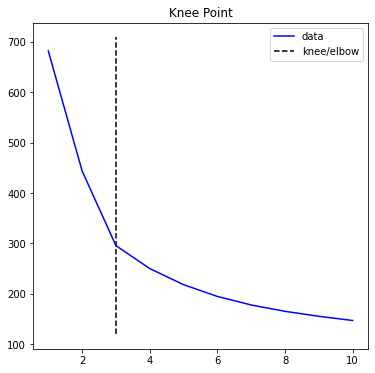

In [104]:
# 시각화로 최적의 k를 확인해보세요.
kneedle.plot_knee()